### Analysis and Portotyping for Characterizing Twist

In [2]:
import MDAnalysis as md
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.analysis import polymer

# Upload and go to last frame
u = md.Universe('md_1.tpr', 'md_1_noPBC.xtc')
u.trajectory[-1]

# Select protein atoms
protein = u.select_atoms("protein")

# Check box dimensions - Should be around 16x16x20
xd, yd, zd = u.trajectory[-1].dimensions[0:3]/10

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Center of the Protein...?

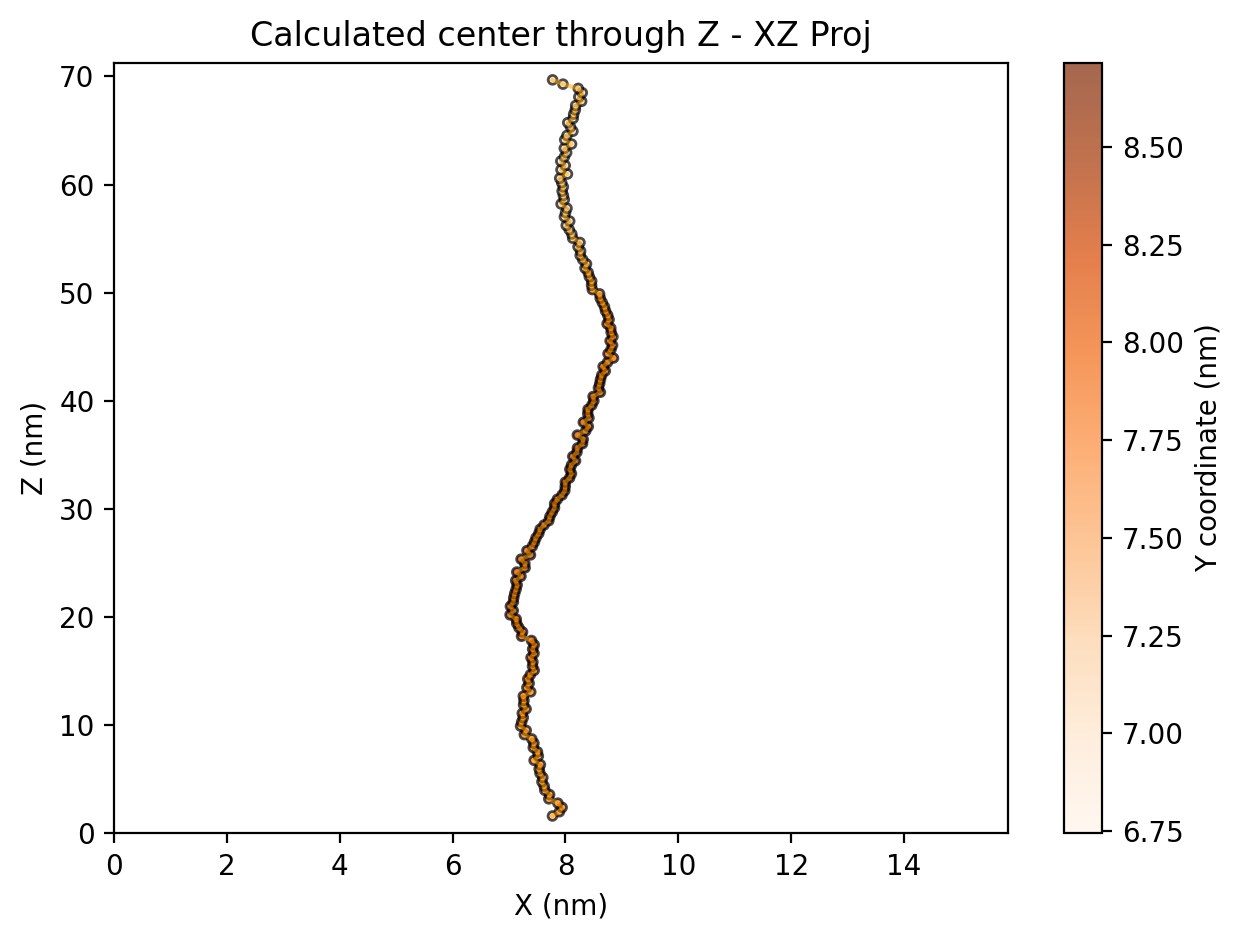

In [3]:
# Characterize Center of the protein

# Get Backbones
backbones = protein.select_atoms("backbone")
coords = backbones.positions/10  # shape (n_atoms, 3)

# Get zmin and zmax
zmin = min(coords[:, 2])
zmax = max(coords[:, 2])

# Number of discretizations and delta z
n = int(len(backbones)/600) # We should get in average 4 atoms per level - play with more
# n = 30
deltaz = (zmax - zmin)/n

center_z = np.zeros((n, 3)) # Array to store center per z (<x>, <y>, z)

for i in range(n):
    # Get ranges of z
    z_low = deltaz*i + zmin
    z_upp = deltaz + z_low
    z_c = z_low + deltaz/2

    # Group atoms
    mask = (coords[:, 2] >= z_low) & (coords[:, 2] < z_upp)
    selected = coords[mask]

    center_z[i] = [np.mean(selected[:, 0]), np.mean(selected[:, 1]), z_c]

# Lets see the result

plt.figure(dpi=200)
plt.plot(center_z[:, 0], center_z[:,2], color='orange', alpha=0.5)
sc = plt.scatter(center_z[:, 0], center_z[:,2], c=center_z[:,1], cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Y coordinate (nm)')
plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Calculated center through Z - XZ Proj")
plt.xlim(0, xd)
plt.ylim(0, zd)
plt.tight_layout()
plt.show()

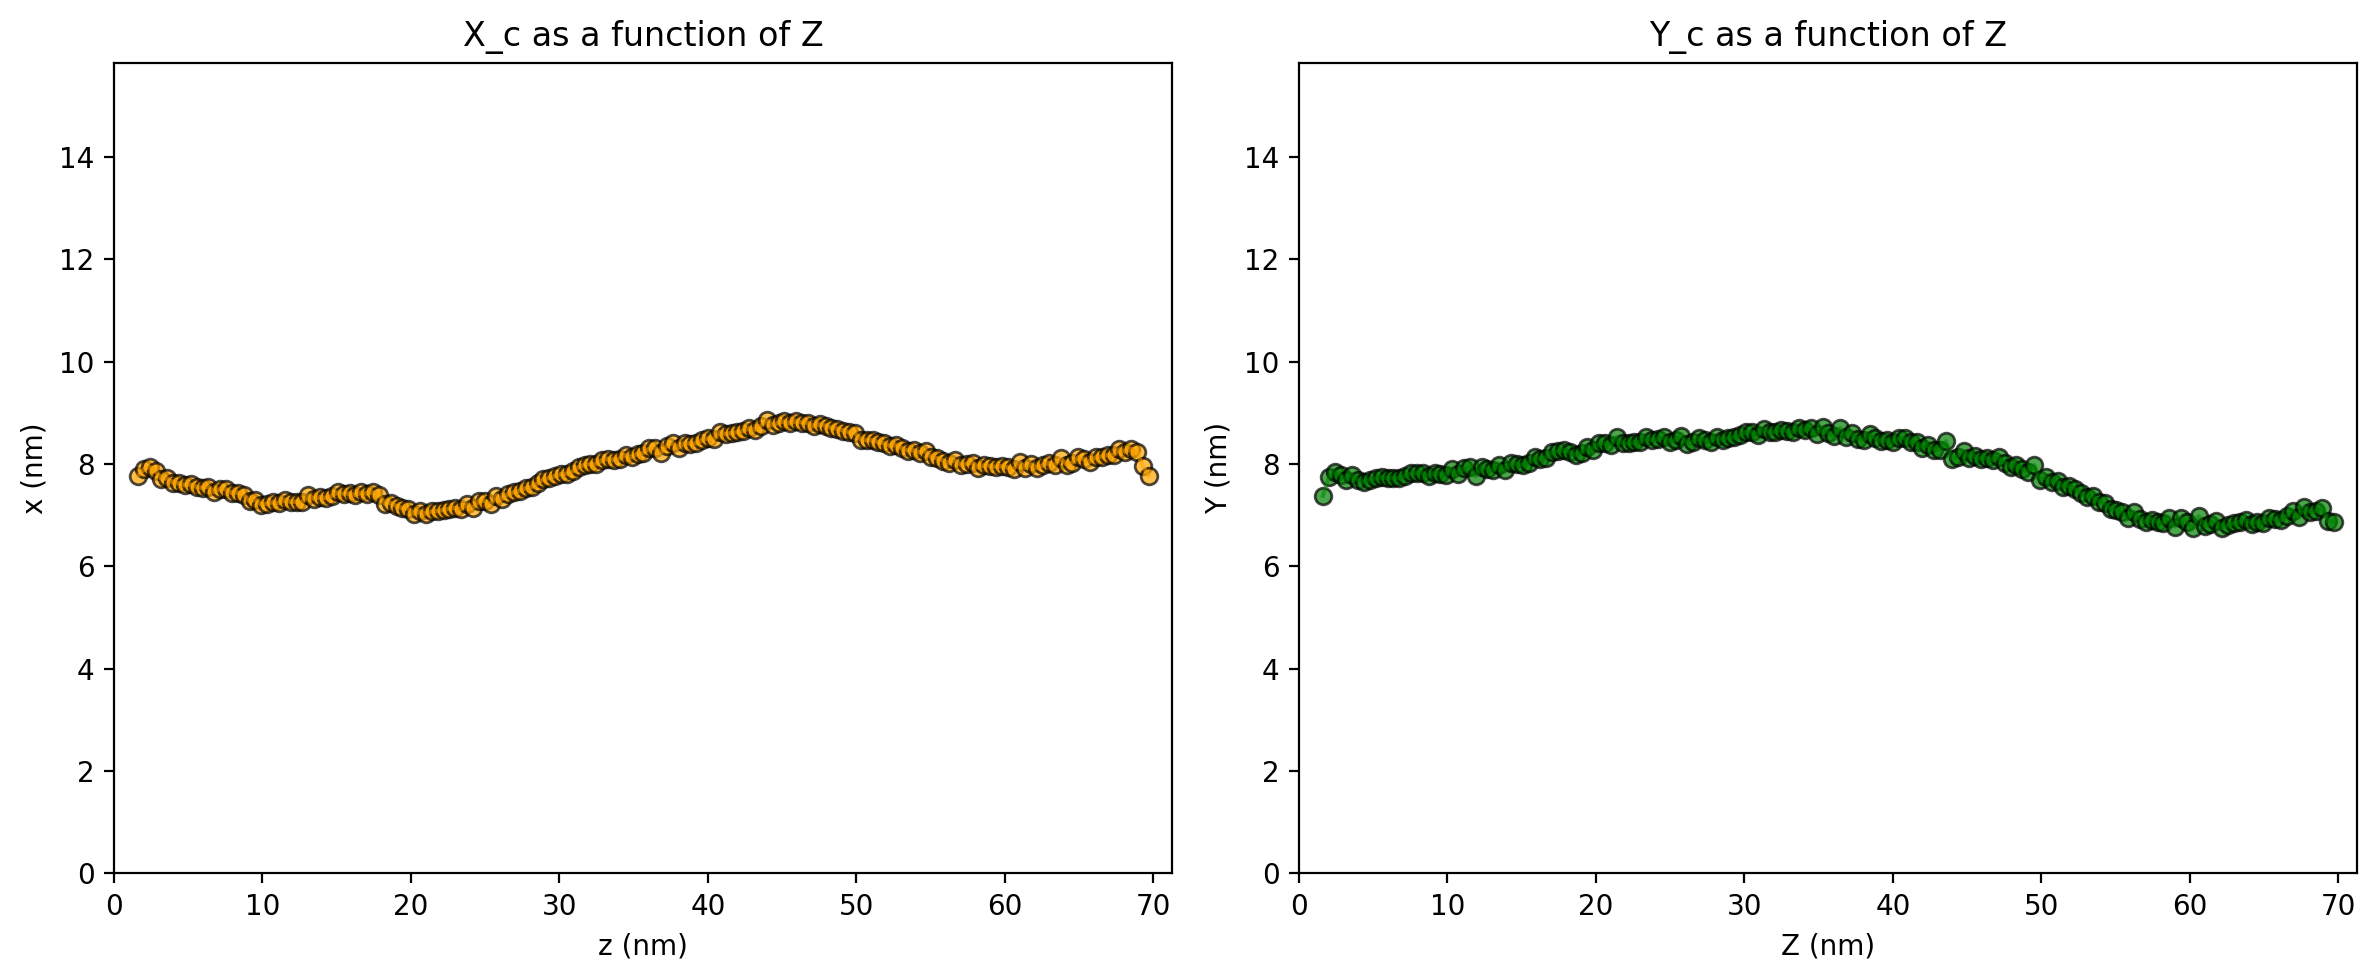

In [4]:
# Get a graph of x as function of z and y as function of z x(z), y(z)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200)

# -- x(z) relation --
axs[0].plot(center_z[:,2], center_z[:,0], color='orange', alpha=0.5)
axs[0].scatter(center_z[:,2], center_z[:,0], color='orange', edgecolor='k', alpha=0.7)

axs[0].set_xlabel("z (nm)")
axs[0].set_ylabel("x (nm)")
axs[0].set_title("X_c as a function of Z")
axs[0].set_xlim(0, zd)
axs[0].set_ylim(0, xd)

# -- y(z) relation --
axs[1].plot(center_z[:,2], center_z[:,1], color='green', alpha=0.5)
axs[1].scatter(center_z[:,2], center_z[:,1], color='green', edgecolor='k', alpha=0.7)

axs[1].set_xlabel("Z (nm)")
axs[1].set_ylabel("Y (nm)")
axs[1].set_title("Y_c as a function of Z")
axs[1].set_xlim(0, zd)
axs[1].set_ylim(0, yd)

plt.tight_layout()
plt.show()

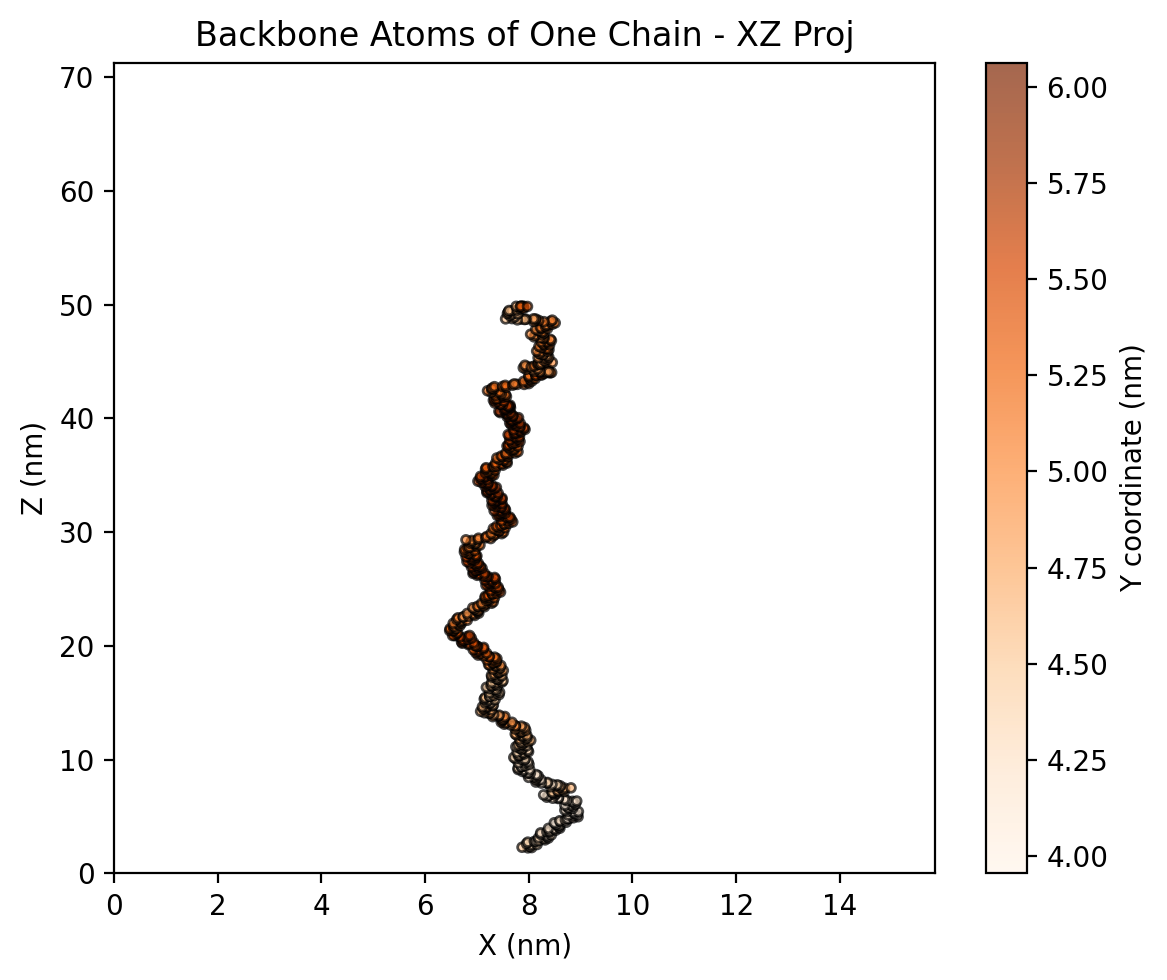

In [6]:
fragment = 2

# Select a Chain
chain = protein.segments[fragment].atoms

# Select Backbones of that Chain
backbone = chain.select_atoms("backbone")

# Coordinates - /10 for correction (?) of scale
coords = backbone.positions  # shape (n_atoms, 3)
x = coords[:, 0]/10
y = coords[:, 1]/10
z = coords[:, 2]/10

# --- XZ Projection ---
plt.figure(figsize=(6,5), dpi=200)
sc = plt.scatter(x, z, c=y, cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Y coordinate (nm)')
plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Backbone Atoms of One Chain - XZ Proj")
plt.xlim(0, xd)
plt.ylim(0, zd)
plt.tight_layout()
plt.show()

Maybe instead of this fragments, one should look at the center of the triple-chains that consitute the collagen molecule:
<p float="left">
  <img src="coll-mol-strcut.jpg" width="25%" />
  <img src="hierchary-coll-struct.png" width="25%" />
</p>

Then instead of fragments as the "chains", we should look at the molecules

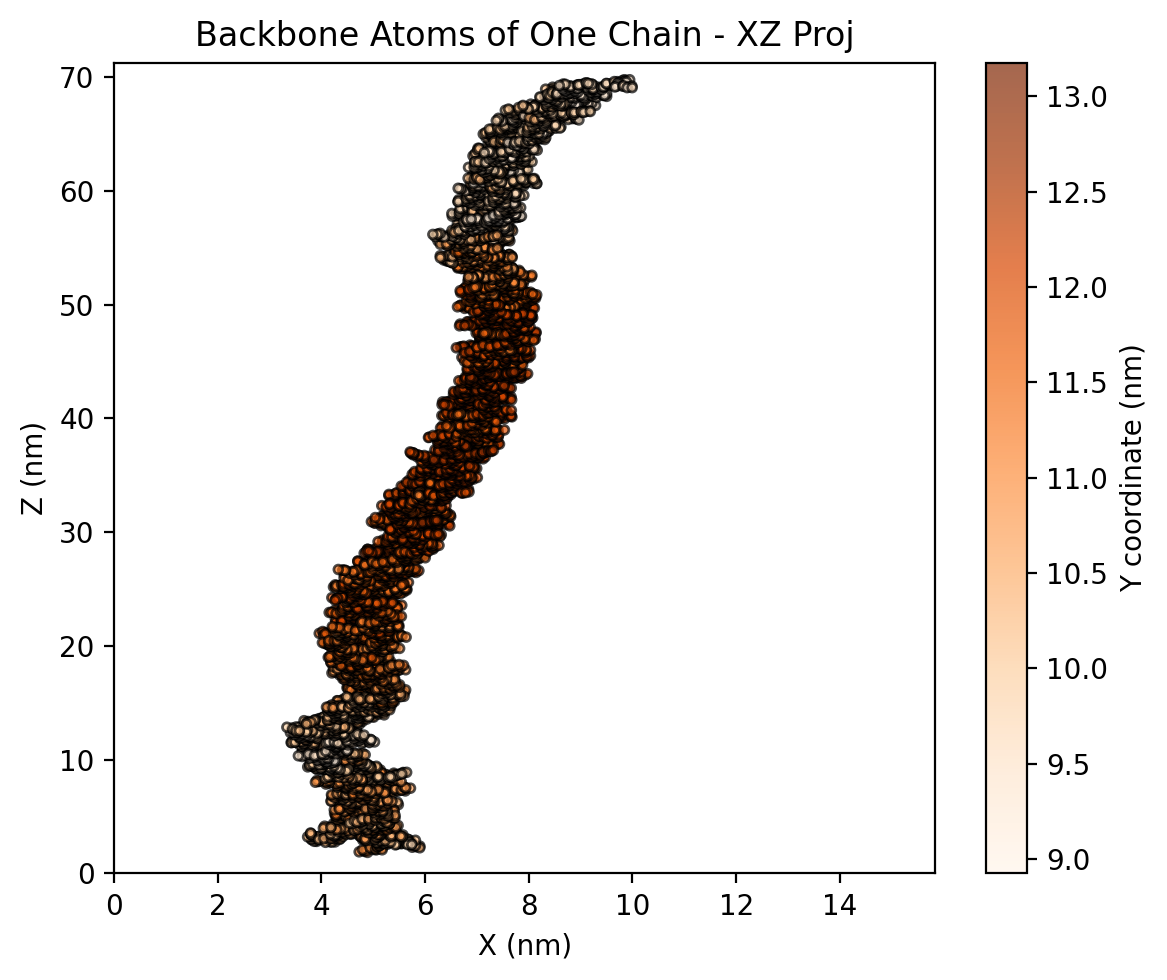

In [29]:
mol = 4

# Select chains of molecule (?)
chains = protein.fragments[3*mol:3*mol + 3]

# Combine atoms (?)
colmol = chains[0] + chains[1] + chains[2]

coords = colmol.positions / 10
x = coords[:, 0]
y = coords[:, 1]
z = coords[:, 2]

# --- XZ Projection ---
plt.figure(figsize=(6,5), dpi=200)
sc = plt.scatter(x, z, c=y, cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Y coordinate (nm)')
plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Backbone Atoms of One Chain - XZ Proj")
plt.xlim(0, xd)
plt.ylim(0, zd)
plt.tight_layout()
plt.show()

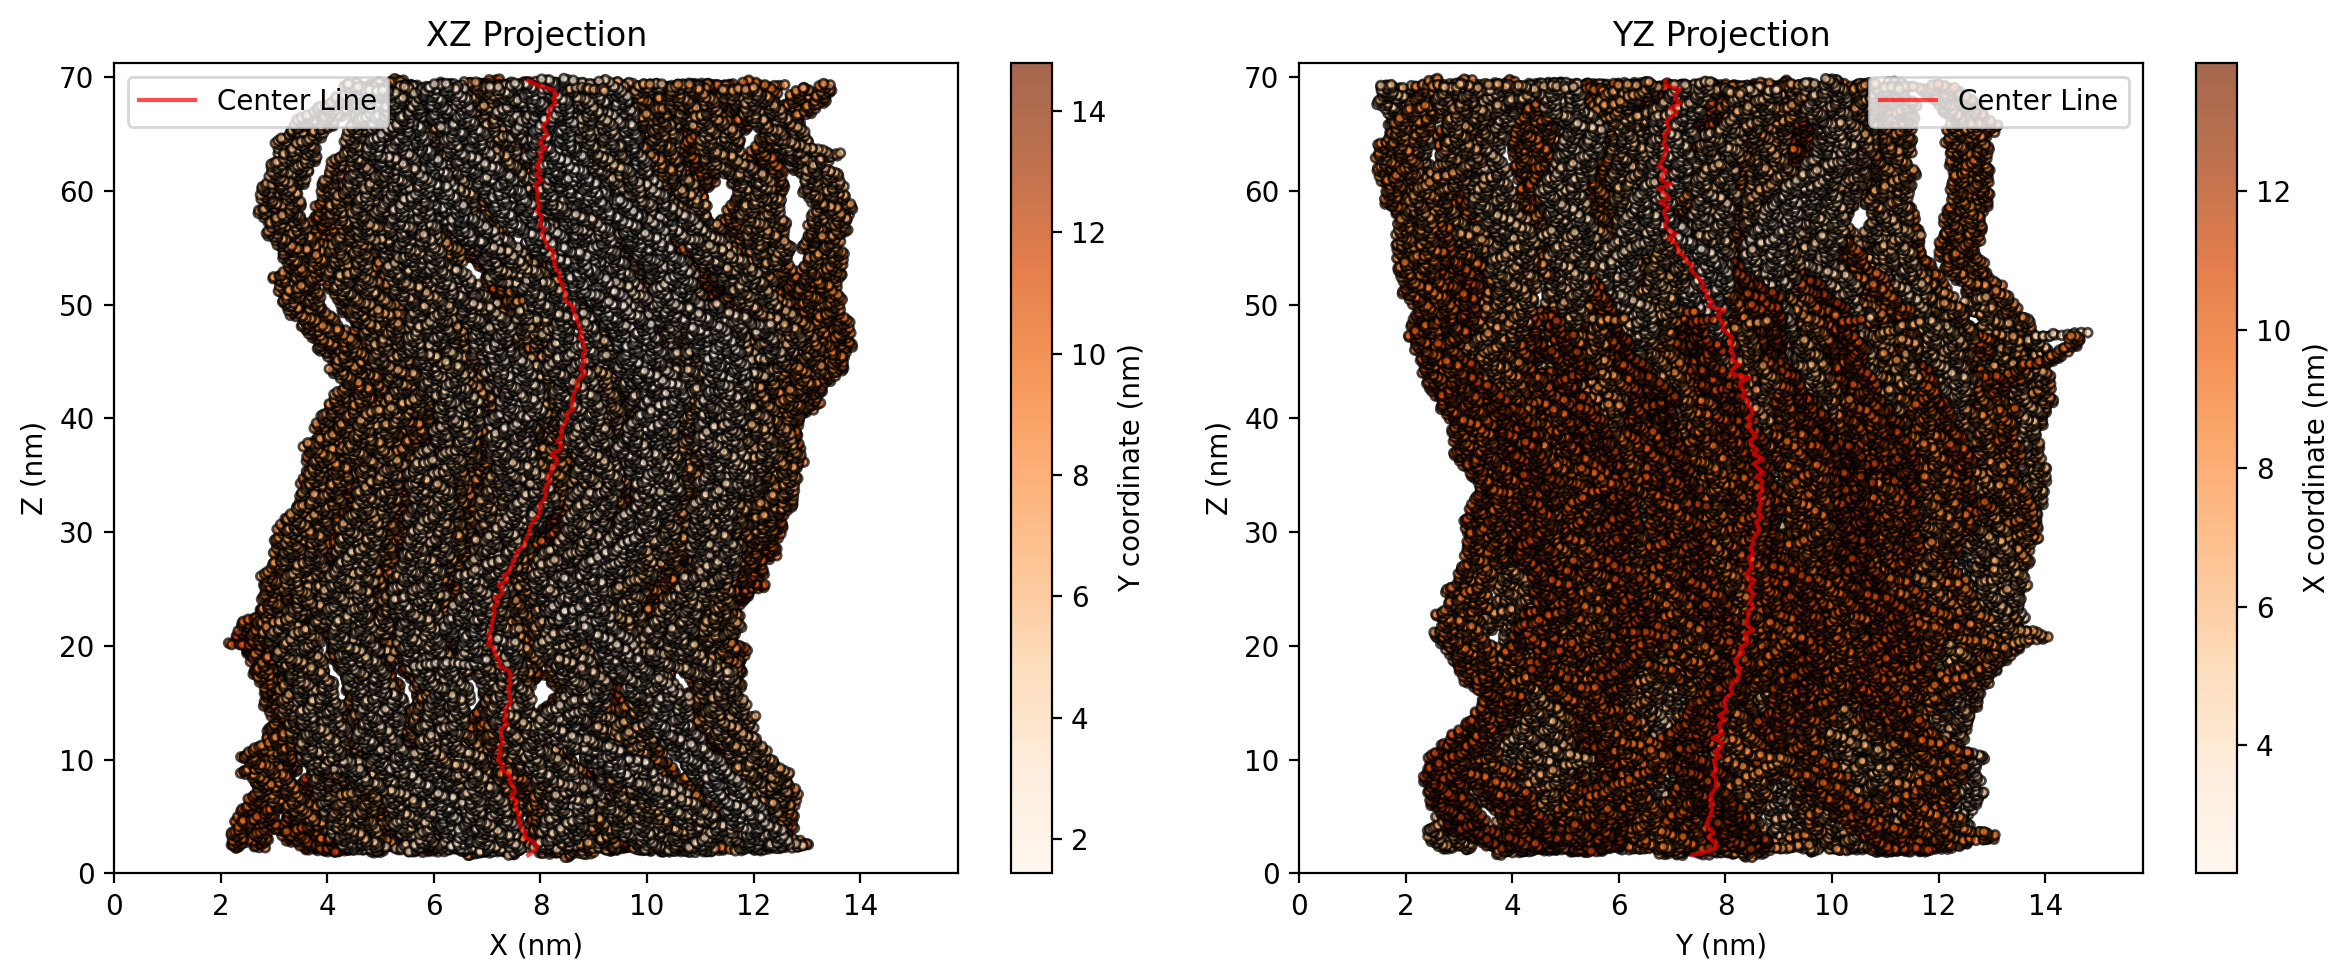

In [7]:
# Compare the center with the whole backbones
backbones = protein.select_atoms("backbone")

# Coordinates - /10 for correction (?) of scale
coords = backbones.positions  # shape (n_atoms, 3)
x = coords[:, 0]/10
y = coords[:, 1]/10
z = coords[:, 2]/10

fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200)

# --- XZ Projection ---
axs[0].scatter(x, z, c=y, cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
axs[0].plot(center_z[:, 0], center_z[:, 2], color='red', alpha=0.7, label='Center Line')
axs[0].set_xlabel("X (nm)")
axs[0].set_ylabel("Z (nm)")
axs[0].set_title("XZ Projection")
axs[0].set_xlim(0, xd)
axs[0].set_ylim(0, zd)
axs[0].legend()
cb0 = fig.colorbar(axs[0].collections[0], ax=axs[0])
cb0.set_label("Y coordinate (nm)")

# --- YZ Projection ---
axs[1].scatter(y, z, c=x, cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
axs[1].plot(center_z[:, 1], center_z[:, 2], color='red', alpha=0.7, label='Center Line')
axs[1].set_xlabel("Y (nm)")
axs[1].set_ylabel("Z (nm)")
axs[1].set_title("YZ Projection")
axs[1].set_xlim(0, yd)
axs[1].set_ylim(0, zd)
axs[1].legend()
cb1 = fig.colorbar(axs[1].collections[0], ax=axs[1])
cb1.set_label("X coordinate (nm)")

plt.tight_layout()
plt.show()